# БАНК

В таблице late_collection_clients представленны данные по кредитам по позднему взысканию

id_client - id клиента, 

id_global , 

id_city - id города, 

gender - пол, 

married - семейное положение, 

first_time - является ли кредит первым, 

age - вораст, 

is_educ - высшее образование, 

cellphone - телефон, 

is_active - не погашен, 

cl_segm - сегмент, 

amt_loan - размер, 

date_loan - дата выдачи, 

credit_type - тип кредита

Словарь регионов region_dict

id_city - id города,

name_city - город,

id_region - id региона,

name_region - регион.



Импортируем библиотеки для обработки данных с помощью SQL запросов


In [ ]:
!pip install pandasql

In [ ]:
import pandas as pd
from pandasql import sqldf
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Предварительно обработаем данные: импортируем из csv в pandas датафрейм,
поменяем названия столбцов, исключив пробелы, формат даты приведем к datetime


In [ ]:
late_collection_clients = pd.read_csv('late_collection_clients.csv', sep = ',')

In [ ]:
late_collection_clients.head()

,ID Client,ID Global,ID City,Gender,Married,First Time,Age,Is Educ,Cellphone,Is Active,Cl Segm,Amt Loan,Date Loan,Credit Type
0,2756,1791.0,15.0,M,False,1.0,82.0,0.0,NaN,0.0,2.0,90000,2021-05-01,TOP-UP
1,2101,3978.0,1.0,F,False,1.0,84.0,0.0,8.916453e+10,0.0,2.0,500000,2020-02-05,POS-1
2,684,3409.0,2.0,M,False,1.0,84.0,1.0,8.916521e+10,1.0,2.0,440000,2021-04-23,POS-1
3,1330,1880.0,2.0,M,False,1.0,44.0,0.0,8.985401e+10,1.0,2.0,440000,2021-04-30,CC
4,734,3494.0,2.0,M,False,1.0,84.0,1.0,8.916150e+10,1.0,2.0,200000,2019-07-13,POS-1


In [ ]:
late_collection_clients.columns = ['id_client', 'id_global' , 'id_city' , 'gender' , 'married' , 'first_time' , 'age' , 'is_educ' , 'cellphone' , 'is_active' , 'cl_segm' , 'amt_loan' , 'date_loan' , 'credit_type' ]

In [ ]:
late_collection_clients.head()

,id_client,id_global,id_city,gender,married,first_time,age,is_educ,cellphone,is_active,cl_segm,amt_loan,date_loan,credit_type
0,2756,1791.0,15.0,M,False,1.0,82.0,0.0,NaN,0.0,2.0,90000,2021-05-01,TOP-UP
1,2101,3978.0,1.0,F,False,1.0,84.0,0.0,8.916453e+10,0.0,2.0,500000,2020-02-05,POS-1
2,684,3409.0,2.0,M,False,1.0,84.0,1.0,8.916521e+10,1.0,2.0,440000,2021-04-23,POS-1
3,1330,1880.0,2.0,M,False,1.0,44.0,0.0,8.985401e+10,1.0,2.0,440000,2021-04-30,CC
4,734,3494.0,2.0,M,False,1.0,84.0,1.0,8.916150e+10,1.0,2.0,200000,2019-07-13,POS-1


In [ ]:
late_collection_clients['date_loan'] = pd.to_datetime(late_collection_clients['date_loan']).dt.date

In [ ]:
late_collection_clients.head()

,id_client,id_global,id_city,gender,married,first_time,age,is_educ,cellphone,is_active,cl_segm,amt_loan,date_loan,credit_type
0,2756,1791.0,15.0,M,False,1.0,82.0,0.0,NaN,0.0,2.0,90000,2021-05-01,TOP-UP
1,2101,3978.0,1.0,F,False,1.0,84.0,0.0,8.916453e+10,0.0,2.0,500000,2020-02-05,POS-1
2,684,3409.0,2.0,M,False,1.0,84.0,1.0,8.916521e+10,1.0,2.0,440000,2021-04-23,POS-1
3,1330,1880.0,2.0,M,False,1.0,44.0,0.0,8.985401e+10,1.0,2.0,440000,2021-04-30,CC
4,734,3494.0,2.0,M,False,1.0,84.0,1.0,8.916150e+10,1.0,2.0,200000,2019-07-13,POS-1


In [ ]:
region_dict = pd.read_csv('region_dict.csv', sep = ',')

In [ ]:
region_dict.head()

,ID City,Name City,ID Region,Name Region
0,9,Краснодар,119,Юг
1,10,Сочи,119,Юг
2,1,Москва,111,Центр
3,2,Москва (область),111,Центр
4,14,Владимир,111,Центр


In [ ]:
region_dict.columns = ['id_city' , 'name_city' , 'id_region' , 'name_region']

С помощью SQL-запроса определим:

общую сумму выданных кредитов - sum_all,

сумму кредитов по городу - sum_city,

сумму кредитов по типу - sum_type,

сумму кредитов по городу и типу кредита - sum_city_type


In [ ]:
q = """select    credit_type
        , name_city
        , date_loan
        , amt_loan
        ----
        , sum(amt_loan) over () as sum_all
        , sum(amt_loan) over (partition by name_city) as sum_city
        , sum(amt_loan) over (partition by credit_type) as sum_type
        , sum(amt_loan) over (partition by name_city, credit_type) as sum_city_type
from late_collection_clients a
    left join region_dict  b
        on a.id_city = b.id_city
order by   name_city
         , date_loan asc
;"""

In [ ]:
sqldf(q)

,credit_type,name_city,date_loan,amt_loan,sum_all,sum_city,sum_type,sum_city_type
0,POS-1,None,2018-04-18,650000,1298760000,69055000,596465000,33480000
1,POS-1,None,2018-04-23,1500000,1298760000,69055000,596465000,33480000
2,POS-2,None,2018-04-25,90000,1298760000,69055000,58560000,7995000
3,RC,None,2018-05-01,110000,1298760000,69055000,248270000,9300000
4,POS-1,None,2018-05-09,70000,1298760000,69055000,596465000,33480000
...,...,...,...,...,...,...,...,...
2992,POS-1,Челябинск,2021-03-25,70000,1298760000,53425000,596465000,25685000
2993,RC,Челябинск,2021-03-26,100000,1298760000,53425000,248270000,13710000
2994,POS-2,Челябинск,2021-04-14,70000,1298760000,53425000,58560000,1945000
2995,RC,Челябинск,2021-04-15,650000,1298760000,53425000,248270000,13710000


Найдем кумулятивные (накопленные) суммы выданных кредитов по датам:

общая сумма выданных кредитов по дням - sum_cum_all,

сумма кредитов по дням для каждого города - sum_cum_city,

сумма кредитов по дням для разных типов кредита - sum_cum_type,

сумма кредитов по дням для разных типов кредита в каждом городе - sum_cum_city_type



In [ ]:
q = '''select    id_client
        , credit_type
        , name_city
        , date_loan
        , amt_loan
        ----
        , sum(amt_loan) over (order by date_loan) as sum_cum_all
        , sum(amt_loan) over (partition by name_city order by date_loan) as sum_cum_city
        , sum(amt_loan) over (partition by credit_type order by date_loan) as sum_cum_type
        , sum(amt_loan) over (partition by name_city, credit_type order by date_loan) as sum_cum_city_type
from late_collection_clients a
    left join region_dict  b
        on a.id_city = b.id_city
order by   date_loan asc;'''

In [ ]:
sqldf(q)

,id_client,credit_type,name_city,date_loan,amt_loan,sum_cum_all,sum_cum_city,sum_cum_type,sum_cum_city_type
0,745,POS-1,Владимир,2018-04-09,375000,415000,375000,415000,375000
1,1831,POS-1,Казань,2018-04-09,40000,415000,40000,415000,40000
2,2788,POS-1,Кострома,2018-04-10,110000,700000,110000,700000,110000
3,1009,POS-1,Сахалинск,2018-04-10,175000,700000,175000,700000,175000
4,1554,POS-1,Екатеринбург,2018-04-11,900000,1600000,900000,1600000,900000
...,...,...,...,...,...,...,...,...,...
2992,753,CC,Нижний Новгород,2021-04-29,750000,1297840000,72485000,148405000,6635000
2993,1330,CC,Москва (область),2021-04-30,440000,1298280000,252075000,148845000,32455000
2994,2445,POS-1,Екатеринбург,2021-05-01,300000,1298760000,80985000,596465000,35265000
2995,2756,TOP-UP,Кострома,2021-05-01,90000,1298760000,34620000,231150000,5395000


Аналогично найдем средние значения выданных кредитов и накопленное среднее

среднее по всем кредитам - avg_all,

среднее по городам - avg_city,

среднее по городам и типу кредита - avg_city_type,

накопленное среднее по дням, по всем кредитам - avg_cum_city,

накопленное среднее по дням для городов - avg_cum_city,

накопленное среднее по дням для городов и типов кредита - avg_cum_city_type

In [ ]:
q = '''select credit_type
        , name_city
        , date_loan
        , amt_loan
        ---
        , round (avg(amt_loan) over (), 2) as avg_all
        , round (avg(amt_loan) over (partition by name_city), 2) as avg_city
        , round (avg(amt_loan) over (partition by name_city, credit_type), 2) as avg_city_type
        ---
        , round (avg(amt_loan) over (order by date_loan), 2) as avg_cum_all
        , round (avg(amt_loan) over (partition by name_city order by date_loan), 2) as avg_cum_city
        , round (avg(amt_loan) over (partition by name_city, credit_type order by date_loan), 2) as avg_cum_city_type
 from late_collection_clients a
    left join region_dict  b
        on a.id_city = b.id_city
 order by date_loan asc;'''

In [ ]:
sqldf(q)

,credit_type,name_city,date_loan,amt_loan,avg_all,avg_city,avg_city_type,avg_cum_all,avg_cum_city,avg_cum_city_type
0,POS-1,Владимир,2018-04-09,375000,433353.35,362620.97,341969.70,207500.00,375000.00,375000.00
1,POS-1,Казань,2018-04-09,40000,433353.35,397414.77,382307.69,207500.00,40000.00,40000.00
2,POS-1,Кострома,2018-04-10,110000,433353.35,290924.37,313032.79,175000.00,110000.00,110000.00
3,POS-1,Сахалинск,2018-04-10,175000,433353.35,335798.32,331190.48,175000.00,175000.00,175000.00
4,POS-1,Екатеринбург,2018-04-11,900000,433353.35,490818.18,518602.94,320000.00,900000.00,900000.00
...,...,...,...,...,...,...,...,...,...,...
2992,CC,Нижний Новгород,2021-04-29,750000,433353.35,402694.44,390294.12,433625.13,402694.44,390294.12
2993,CC,Москва (область),2021-04-30,440000,433353.35,557688.05,636372.55,433627.25,557688.05,636372.55
2994,POS-1,Екатеринбург,2021-05-01,300000,433353.35,490818.18,518602.94,433353.35,490818.18,518602.94
2995,TOP-UP,Кострома,2021-05-01,90000,433353.35,290924.37,337187.50,433353.35,290924.37,337187.50


Посчитаем скользящее среднее (moving average) выданных кредитов по месяцам

среднее за рассматриваемый месяц и два предшествующих - ma_3,

среднее за рассматриваемый месяц и шесть предшествующих - ma_7,

среднее за три предшестующих и три предыдущих рассматриваемому - ma_7_2side


In [ ]:
q = '''
with t as
(select    strftime('%Y-%m',date_loan) as month_credit
        , sum(amt_loan) as amt_loan
from late_collection_clients a
    left join region_dict b
        on a.id_city = b.id_city
group by month_credit
)
select    t.*
        , round (avg(amt_loan) over (order by month_credit rows between 2 preceding and current row), 2) as ma_3
        , round (avg(amt_loan) over (order by month_credit rows between 6 preceding and current row), 2) as ma_7
        , round (avg(amt_loan) over (order by month_credit rows between 3 preceding and 3 following), 2) as ma_7_2side
        , round (avg(amt_loan) over (), 2) as avg_all
from t;'''

In [ ]:
sqldf(q)

,month_credit,amt_loan,ma_3,ma_7,ma_7_2side,avg_all
0,2018-04,21710000,21710000.00,21710000.00,27187500.00,34177894.74
1,2018-05,25500000,23605000.00,23605000.00,28809000.00,34177894.74
2,2018-06,33400000,26870000.00,26870000.00,27986666.67,34177894.74
3,2018-07,28140000,29013333.33,27187500.00,28591428.57,34177894.74
4,2018-08,35295000,32278333.33,28809000.00,30434285.71,34177894.74
5,2018-09,23875000,29103333.33,27986666.67,30427142.86,34177894.74
6,2018-10,32220000,30463333.33,28591428.57,30980000.00,34177894.74
7,2018-11,34610000,30235000.00,30434285.71,31592142.86,34177894.74
8,2018-12,25450000,30760000.00,30427142.86,31227857.14,34177894.74
9,2019-01,37270000,32443333.33,30980000.00,31750714.29,34177894.74


In [ ]:
ma = sqldf(q)

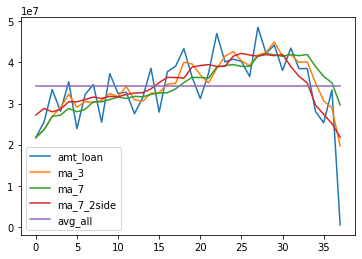

In [ ]:
ma.plot()

Рассчитаем суммы выданных кредитов

сумма кредитов за текущую дату и две предшествующих - sum_minus_2,

кумулятивная сумма за текущую дату и все предшествующие - sum_cum,

сумма кредитов за текущую дату и все предшествующие - sum_minus_all,

сумма кредитов за текущую дату и все последующие - sum_plus_all,

сумма кредитов за все предыдущие даты и все последующие - sum_fin,

сумма всех выданных кредитов - sum_fin1




In [ ]:
q = '''select    
          date_loan
        , amt_loan
        , sum(amt_loan) over (order by date_loan rows between 2 preceding and current row) sum_minus_2
        , sum(amt_loan) over (order by date_loan) sum_cum
        -------
        , sum(amt_loan) over (order by date_loan rows between unbounded preceding and current row) sum_minus_all
        ------
        , sum(amt_loan) over (order by date_loan rows between current row and unbounded following) sum_plus_all
        -----
        , sum(amt_loan) over (order by date_loan rows between unbounded preceding and unbounded following) sum_fin
        , sum(amt_loan) over () as sum_fin1
from late_collection_clients a
    left join region_dict b
        on a.id_city = b.id_city
order by date_loan;'''

In [ ]:
sqldf(q)

,date_loan,amt_loan,sum_minus_2,sum_cum,sum_minus_all,sum_plus_all,sum_fin,sum_fin1
0,2018-04-09,375000,375000,415000,375000,1298760000,1298760000,1298760000
1,2018-04-09,40000,415000,415000,415000,1298385000,1298760000,1298760000
2,2018-04-10,175000,590000,700000,590000,1298345000,1298760000,1298760000
3,2018-04-10,110000,325000,700000,700000,1298170000,1298760000,1298760000
4,2018-04-11,900000,1185000,1600000,1600000,1298060000,1298760000,1298760000
...,...,...,...,...,...,...,...,...
2992,2021-04-29,440000,2070000,1297840000,1297840000,1360000,1298760000,1298760000
2993,2021-04-30,440000,1630000,1298280000,1298280000,920000,1298760000,1298760000
2994,2021-05-01,90000,970000,1298760000,1298370000,480000,1298760000,1298760000
2995,2021-05-01,300000,830000,1298760000,1298670000,390000,1298760000,1298760000
